In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [2]:
# defining class for SVM
# this is only a implementation of SVM not the best 
# SMO - is one of the optimisation method where the features are classified/trained in batches
# as the number fo the features becomes large the computation increases and SMO is one of the workarounds
class Support_Vector_Machine:
    #when the class object is initialized this is the only function that is invoked
    # similar to a constructor
    def __init__(self, visualization=True):
        # this is to enable visualization
        # defined colors for different class
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            # (1,1,1) means there will be 1 * 1 grid and this is the first subplot
            self.ax = self.fig.add_subplot(1,1,1)
    
    # train
    # self is to share variables
    def fit(self, data):
        self.data = data
        # dictionary will contain possible values of w and b as values
        # and magnitude of the ||w|| as key
        # so now we just need to find the key having least value 
        #{ ||w||: [w,b] }
        opt_dict = {}
        
        # this is to find the variety of values of w
        # this is done because (x,y), (-x,y), (-x,-y), (x,-y) gives the same amplitdue
        # but may give differnt value when we find w.x+b
        transforms = [[1,1],
                    [-1,1],
                    [1,-1],
                    [-1,-1]]
        all_data = []
        
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
      #  print(all_data)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # this is to change value of w when we try to find the lease value of w
        # in the convex optimization problem
        # we cannot thread this step since we do not know which step can be run to get perfect score
        step_sizes = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     self.max_feature_value * 0.001,]
        
        # extremely expensive
        # b doesnot have to be as precise as W and it does not have to change
        # as small as w change to find best value
        #this is the reason why we take b multiplier as 5
        b_range_multiple = 5
        
        #we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
          #  print("w: ",w)
          #  print("size: ", w.shape)
            # this is a check flag used to see if the optimal value has been
            # calculated for w in the convex optimization
            optimized = False
            # we can thread this step
            while not optimized:
                # -1*(self.max_feature_value * b_range_multiple) = -50
                # (self.max_feature_value * b_range_multiple) = 50
                # step * b_multiple = a multiplier of 5
                # this means that b will range from -50 to 50 with step size as 5
                for b in np.arange(-1*(self.max_feature_value * b_range_multiple),
                                 self.max_feature_value * b_range_multiple,
                                 step * b_multiple):
                    
                    # we are going to try different variation using transform matrix
                    for transformation in transforms:
                        w_t = w * transformation
                        
                        found_option = True
                        #weakes link int he SVM fundamentally
                        #SMO attempts to fix this abit
                        # yi(xi.w + b) >= 1
                        # first we will assume that all samples satisfy above equation
                        # then check if atleast one of the sample fails then found_option = FALSE and break
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t, xi)+b) >= 1:
                                    found_option = False
                        
                        if found_option:
                            # if found_option is True then we will find magnitude                            
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                            #print((w_t))
                           # print(w[0], " :: ")
                # once we are done with all possible values of b and w
                # then we check w[0] is less than 0
                # this may happen for one step
                # if not we change the value of w
                
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step
                    
            
            # we just sorting the magnitude of those w
            norms = sorted([n for n in opt_dict])
            # dictionary is of the following order
            # ||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
      #      print(opt_choice)
            self.w = opt_choice[0]
      #      print(self.w)
            self.b = opt_choice[1]
      #      print(self.b)
            # we are going to take random value of w to be the best value for w and
            # then change it using optimization
            # this process will be done after first value of step_sizes is done
            latest_optimum = opt_choice[0][0] + step*2
      #      print(opt_choice[0][0])
        #to test if the alogrithm is working or not
        # we can print the value of y*(x.w+b) is equal to 1 where w and b are the final values used for classification
        # if there is a value very close to 1, then that means that svm is optimized
        # if not then svm is not optimized. In that case, we change add more step_sizes or change value of b_range_multiple
        print("length:",len(opt_dict))   
        for opt_item in opt_dict:
            print (opt_item, opt_dict[opt_item])
     #   print("optimal: ", opt_dict[0])
        print(type(opt_dict))
        for i in self.data:
            for xi in self.data[i]:
                yi = i
       #         print(xi,':',yi*(np.dot(self.w,xi)+self.b))
         
    # this function is to classify the data
    # classification is done with the below formula
    # sign(x.w + b)                
    def predict(self, features):
        # w and b are values which we need to find out
        print("optimal: ", self.w, " and ", self.b, " and class is: ")
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s= 200, marker = '*', c=self.colors[classification])
        # returning the classification 
        print(classification)
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s = 100, color = self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        #hyperplane = x.w + b
        # v is the value for hyperplane
        # v = x.w + b
        # positive vector, psv = 1
        # nsv = -1
        # decision boundary = 0
        # we only care the value of v for the above cases
        # this is just for plotting not for SVM
        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v)/w[1]
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # postive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2])
        
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2])
        
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2])
        
        plt.show()

In [6]:
# defining a sample data set
data_dict = {-1:np.array([[4,10],
                          [1,7],
                          [-1,12],
                          [6,12],
                          [-3,5],
                          [8,14],
                          [0,13],
                          [2,15],
                          [-5,10],
                          [10, 6],
                          [5, 15],
                          [-7,0],
                          [0,20],
                          [-5,0],
                          [-8,15],
                          [-4, 15],
                          [10, 15],
                          [1, 11],
                        [2,8],
                        [3,8],]),
            1:np.array([[5,1],
                      [6,-1],
                      [7,3],
                       [0,-5],
                       [8,0],
                       [4,0],
                       [4,-10],
                       [1,-7],
                       [-3,-6],
                        [10,-5],
                        [9,4],
                        [2,-6],
                        [-7,-13],
                        [7,-15],
                        [4, -4],
                        [13,7],
                        [15,10],
                        [12,3],
                        [10,5],
                       [-5,-9]])}

Optimized a step.
Optimized a step.
Optimized a step.
length: 155
282.842712474619 [array([ 200, -200]), 90.0]
280.0142853498728 [array([ 198., -198.]), 90.0]
277.18585822512665 [array([ 196., -196.]), 90.0]
274.35743110038044 [array([ 194., -194.]), 90.0]
271.5290039756342 [array([ 192., -192.]), 90.0]
268.70057685088807 [array([ 190., -190.]), 90.0]
265.87214972614186 [array([ 188., -188.]), 90.0]
263.0437226013957 [array([ 186., -186.]), 90.0]
260.2152954766495 [array([ 184., -184.]), 90.0]
257.3868683519033 [array([ 182., -182.]), 90.0]
254.55844122715712 [array([ 180., -180.]), 90.0]
251.7300141024109 [array([ 178., -178.]), 90.0]
248.90158697766472 [array([ 176., -176.]), 90.0]
246.07315985291854 [array([ 174., -174.]), 90.0]
243.24473272817235 [array([ 172., -172.]), 90.0]
240.41630560342617 [array([ 170., -170.]), 90.0]
237.58787847867995 [array([ 168., -168.]), 90.0]
234.75945135393377 [array([ 166., -166.]), 90.0]
231.93102422918759 [array([ 164., -164.]), 90.0]
229.102597104

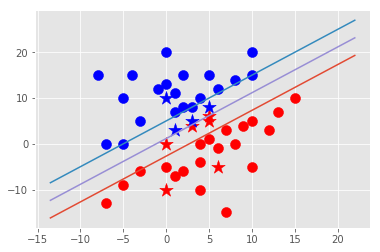

In [7]:
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
predict_us = [[0,10],
             [1,3],
             [3,4],
             [3,5],
             [5,5],
             [5,6],
             [6,-5],
             [5,8],
             [0,0],
             [0,-10]]

for p in predict_us:
    svm.predict(p)
    
svm.visualize()

In [ ]:
predict_us = [[0,10],
             [1,3],
             [3,4],
             [3,5],
             [5,5],
             [5,6],
             [6,-5],
             [5,8]]

for p in predict_us:
    svm.predict(p)
    
svm.visualize()

In [8]:
svm.visualize()

In [46]:
svm.predict([5,2])

1.0